# Problem 1


For this problem, let's use the Pollard p-1 factorization method as described on Page 135 of the text. The algorithm says that you should let $j=2,3,...$ up to "a specified bound" - let's call that bound M.

Let $q = 10^{100} + 21049$.  

Find a prime $p$ such that
 - $p$ has over 300 decimal digits, but
 - $pq$ factors in at most M=200 steps with Pollard's $p-1$ factorization algorithm.

Note: the size of P makes this problem far too big to attempt a brute-force search.  Instead, you'll have to read carefully why it is that the Pollard p-1 factorization algorithm works.

In [ ]:
import math
import random
# This function takes in a large number and gives a list of all small prime factors up to an upper index of M.
def small_factorer(number, M):
    # Creating an array to store the factors
    factors = []
    # iterating up to the upper index
    for i in range(M):
        # Computing index
        index = i+1
        # Base case 
        if (index == 1):
            continue
        # If the remainder of the number divided by the index is zero
        if (number%index==0):
            # Set a count variable to zero
            count = 0
            while 1:
                # Divide the number by the index
                number//=index
                # Increment count
                count += 1
                # If no longer divisible then break
                if number%index!=0:
                    break     
            # Append factors with the index and count 
            factors.append([index, count])
    # If no small factors found, return 0
    if (len(factors)==0):
        return 0
    else:
        # return discovered factors
        return factors
# This functions the same as all prime seives up to an index and is from assignment 0
def sieve(n):
    primes = []
    array = [1 for i in range(n)]
    array[0] = 0
    for i in range(n):
        index = i+1
        if array[i] ==1 :
            primes.append(index)
            index += index
            while index<=n:
                array[index-1] = 0
                index += i+1
    return primes
# Basic factorial calculator
def factorial(n):
    result = 1
    for i in range(n):
        result*= (i+1)
    return result
# GCDEX function from Assignment 1
def gcdex(a, b):
    p1 = 1
    q1 = 0
    h1 = a
    p2 = 0
    q2 = 1
    h2 = b
    while h2 != 0:
        r = h1 // h2
        p3 = p1 - r * p2
        q3 = q1 - r * q2
        h3 = h1 - r * h2
        p1 = p2
        q1 = q2
        h1 = h2
        p2 = p3
        q2 = q3
        h2 = h3
    return h1
# Fast power calculator from Assignment 1
def faster(a, p, mod):
    square = a
    answer = 1
    while p > 0:
        if p % 2 == 1:
            p -= 1
            answer *= square
            answer %= mod
        p //= 2
        square = square ** 2 % mod
    return answer % mod
# Miller rabin primality test from Assignment 2
def miller(p):
    prime = p
    p_1 = p-1
    for i in range(100):
        rand = math.floor((random.random() * 2**32))
        if faster(rand, p_1, p) != 1:
            return False
        k = 0
        while p%2 == 0:
            k += 1
            p/=2
        array = []
        for i in range(k+1):
            modded = faster(rand, (2**k*p), prime)
            array.append(modded)
            if modded == 1:
                if array[i-1] != 1 or array[i-1] != -1:
                    return False
    return True
# Function to find a large prime
def find_p(steps):
    # Compute the factorial of the number of steps you want the computer to take to solve
    big_factorial = factorial(steps)
    # Create a prime seive array up to that number
    primes = sieve(steps)
    # Creating an infinite while loop
    while 1:
        # Setting a temporary variable to that big factorial
        temp = big_factorial
        # Choosing 5 random primes from the list and dividing them from the big factorial temp variable
        for i in range(5):
            temp//=random.choice(primes)
        # if this new number + 1 is prime, return the temp variable + 1
        if miller(temp+1):
            return (temp+1)
# Parameter setting
q = 10**100 + 21049
M = 200
p = find_p(200)
# Printing the number
print(p)
# Converting number to string then printing number of digits
print(len(str(p)))

# Problem 2

Let $L(X) = \exp \sqrt{(\ln X)(\ln \ln X)}.$ This function comes up several times when analyzing the run time of the quadratic sieve.

Let $\alpha, \beta > 0.$ Explain why, for all sufficiently large $X$, $(\ln(X))^{\beta} < L(X) < X^{\alpha}$.

This is asking for a mathematical argument, not a code argument - just type up your argument in a LaTeX / Markdown cell.  You can use the fact that logarithms grow more slowly than polynomials, which grow more slowly than exponentials.  That is, given any a,b,c, we have $$ (\ln(x))^a < x^b < (e^x) ^c $$ for sufficiently large x.


https://drive.google.com/file/d/1FTnj-4fQcBfIGOKYn_7-SuMxU9uI3Hud/view?usp=sharing

First of all, we know that L(X) is equal to e^sqrt(lnx*ln(lnx)).
Let us first break up the inequality into two smaller parts, ln(x)^b < L(x) and L(x) < x^a
We know that all of these values are greater than zero therefore we can square each side so that the inequality holds true.
In our first inequality, this gives us e^(lnx*ln(lnx))<L(x)^2
This can be reduced to 

# Problem 3

Let $\pi(X)$ be the number of primes less than $X$, and let $\psi(X,B)$ denote the number of $B$-smooth numbers less than $X$.  Also, let $L(X) = \exp \sqrt{(\ln X)(\ln \ln X)}$; put $$B = L(X)^{\frac{1}{\sqrt{2}}}.$$

In order to do difference-of-squares factoring, we would need to find $\pi(B)$ numbers between 1 and $X$ which are $B$-smooth.  I claimed, without proof, that if we do this by picking random numbers in the range $[1,X]$, then we'll need to inspect about $L(X)^{\sqrt{2}}$ numbers. (Prop 3.47(a))

Verify this claim experimentally. For a variety of values of $X$:

- compute $B$ and $\pi(B)$ exactly,
- approximate $\psi(X,B)$ by choosing a random sample numbers between 1 and $X$ and checking whether they're $B$-smooth or not,
- compute an approximate value of $$\frac{X\pi(B)}{\psi(X,B)}.$$

Plot these values, over top of a graph of $L(X)^{\sqrt{2}}$.  Use your judgement to pick relevant values of $X$, as well as the size of the random sample.  Since I'm asking you to graph a subexponential function, a log-log scale graph is probably the way to go.

You can use trial division for checking $B$-smoothness (since we're looking at random numbers, the sieve methods won't apply).  


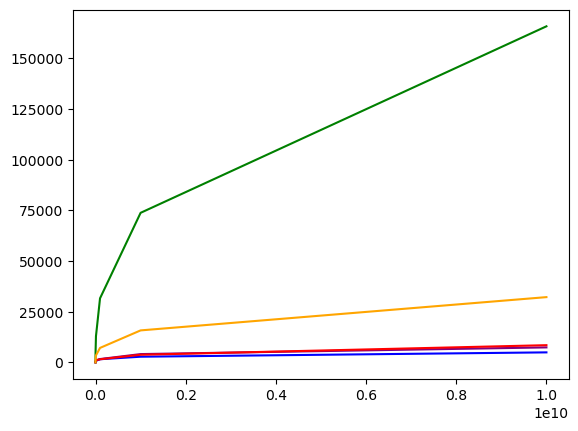

In [7]:
import math
import random
from matplotlib import pyplot as plt
# Creating a function to call ln(x) easier
def ln(x):
    return math.log(x)

# Creating a function to call sqrt(x) easier
def sqrt(x):
    return math.sqrt(x)

# Function to find B given x
def findB(x):
    # Creating the exponent in the L(x) equation
    exponent = sqrt(ln(x) * ln(ln(x)))
    # Raising e to that exponent * 1/sqrt(2) so B = L(x)**(1/sqrt(2))
    B = math.e ** (exponent*(1 / sqrt(2)))
    # Returning floor so that the number returned is an integer
    return round(B)

# Function to get all primes less than B
def pi(B):
    # Initializing factor array
    factors = []
    possibles = [1 for i in range(B + 1)]
    # Setting position for 0 and 1 to 0
    possibles[0] = 0
    possibles[1] = 0
    # Iterating over the range of B+1 (because 0 is included here)
    for i in range(B + 1):
        # If the index of the number is 1
        if possibles[i] == 1:
            # Appending factors with the index
            factors.append(i)
            # Change all multiples less than B to 0
            new = i ** 2
            # Iterating over all index multiples less than B
            while new <= B:
                possibles[new] = 0
                new += i
    # Returning the array of small prime factors : Note this is not a number
    return factors

# I have two psi functions with different uses
# This psi function searches for 100 B-Smooth numbers and keeps track of the total number of numbers less than X checked
# Once it finds 100 B-smooth numbers, it returns (100/iterator) * X which is a good estimate for the number of B-smooth
# numbers less than X.
def psi(x):
    # Determining B with the created findB function
    b = findB(x)
    # Getting the array of prime factors less than or equal to B
    factors = pi(b)
    # Initializing an array to store B-smooth numbers
    smooth_nums = []
    # Creating an iterator variable
    iterator = 0
    # Creating while statement to execute until broken
    while 1:
        # Incrementing iterator
        iterator += 1
        # Creating a random number between 0 and x
        randm = math.ceil(random.random() * x)
        # Creating a copy of this random number
        random_cpy = randm
        # Iterator over primes less than / equal to B
        for factor in factors:
            # If remainder of random number / prime factor is 0
            while randm % factor == 0:
                # Keep dividing by the prime factor until the remainder is not zero
                randm //= factor
        # If the random number has been reduced to 1
        if randm == 1:
            # Add it to the list of smooth numbers
            smooth_nums.append(random_cpy)
        # If 100 smooth numbers have been found
        if len(smooth_nums)==100:
            # Break from the function
            break
    # Approximate number of B-smooth numbers less than x by taking the ratio of those found over the number of guess
    # then multiplying by x
    approx = round((100 / iterator)*x)
    # Returning the rounded number so the answer is an integer
    return approx

# This function is slightly different than the previous
# This function continues the iterations until pi(B) B-smooth numbers have been found
# If it finds this many B-smooth numbers, it breaks from the function and returns the number of numbers checked
# I would argue this aligns better with the text as the text states we expect to check L(X)**(sqrt(2) number in order
# to find pi(B) B-smooth numbers.
def psi_pi(x):
    # Same process here
    b = findB(x)
    factors = pi(b)
    # Setting a variable to hold the number of primes less than or equal to B
    pi_b = len(factors)
    smooth_nums = []
    iterator = 0
    # Same process here
    while 1:
        iterator += 1
        randm = math.ceil(random.random() * x)
        random_cpy = randm
        for factor in factors:
            while randm % factor == 0:
                randm //= factor
        if randm == 1:
            smooth_nums.append(random_cpy)
        # Here I check if we've found pi(b) B-smooth numbers
        if len(smooth_nums)==pi_b:
            # if so, break
            break
    # Returning a count of the total number of numbers checked
    return iterator

x_list = []
# Creating a logarithmic x-axis
for i in range(10):
    x_list.append(10**(i+1))
# these are explained later
psi_ylist = []
lx_ylist = []
lx2_ylist = []
iterator_ylist = []
approx_ylist = []
for x in x_list:
    # Finding B
    b = findB(x)
    # Finding pi(b)
    pi_b = len(pi(b))
    # Computing (x*pi(b))/psi(x,b)
    psi_y = (x*pi_b)//psi(x)
    # Computing exponent for L(X)
    exponent = sqrt(ln(x) * ln(ln(x)))
    # Computing L(X)
    L_x = math.e ** (exponent)
    # Computing L(X)**sqrt(2)
    L_x2 = math.e ** (exponent*(sqrt(2)))
    # Computing L(X)**(1/sqrt(2))
    L_x_2 = math.e ** (exponent*(1/sqrt(2)))
    psi_ylist.append(psi_y)
    lx_ylist.append(L_x)
    iterator_ylist.append(psi_pi(x))
    lx2_ylist.append(L_x2)
    approx_ylist.append(L_x_2*pi_b)
# This graph maps the functions as exactly given or (x*pi(x))/psi(x,b)
plt.plot(x_list, psi_ylist, color = "purple")
# The trajectory follows the graph of L(x) which is much closer to the accurate amount of numbers
# needed to check compared to L(x)**(sqrt(2)
plt.plot(x_list, lx_ylist, color = "blue")
# This trajectory is far off from all others, I will ignore this for now
plt.plot(x_list, lx2_ylist, color = "green")
# This trajectory uses the psi_pi(x) function to continue checking numbers until pi(b) B-smooth numbers have been found
# This is the brute force method but also gives the true amount of numbers needed to find pi(b) B-smooth numbers
plt.plot(x_list, iterator_ylist, color = "red")
# This trajectory is an approximation of how many numbers must be checked to find pi_b B-smooth numbers
# It considers psi(x,b)/x to be about L(x)**(-1/sqrt2) so the resulting equation is pi_B*L(x)**(1/sqrt2)
# As you can see this follows a trajectory relatively similar to the other as anticipated
plt.plot(x_list, approx_ylist, color = "orange")
plt.show()
# You will need to zoom in to see the distinguishable difference between the red and purple line.

# As we can see the closest modeled trajectory to the actual number of guesses (the graph colored red) to find pi(b)
# B-smooth numbers is (x*pi(x))/psi(x,b) by the graph colored in purple. We can also see the graph of L(x) is
# very close to modeling this as well. Notice that approximating psi(x,b) (the graph colored orange)
# in our original equation (pi(b)*x)/psi(x,b) gives us a similar trajectory to the original
# with some deviance, as expected. In conclusion, the most accurate predictor of how many numbers we should guess is
# the original equation given : (x*pi(b))/psi(x,b). However, the fastest way of getting a good approximation is to
# simply calculate L(X).


